# Predictive alalysis of ANZ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#gathering data
df=pd.read_excel('ANZ synthesised transaction dataset.xlsx')
pd.set_option('display.max_columns', None)
df.drop(['merchant_code','bpay_biller_code'],axis=1,inplace=True)
df['extraction']=pd.to_datetime(df['extraction'])

In [3]:
df.sort_values('first_name',inplace=True)

# Feature engineering

In [117]:
#identifying salaries and features
customers=df['first_name'].sort_values().unique()
salaries=[]
Norm_spending=[]
age=[]
gender=[]
pos=[]
spos=[]
payment=[]
inter_bank=[]
long_lat=[]
mean_balance=[]
for customer in customers:
    df_temp=df[df['first_name']==customer]
    #variables
        #amount
    #df_amount=df_temp[df_temp['txn_description']!='PAY/SALARY']
    nsp=df_temp['amount'].sum()
    
    
    aget=df_temp['age'].unique()[0]
    long_latt=float(df_temp['long_lat'].unique()[0].split()[0])+float(df_temp['long_lat'].unique()[0].split()[1])
    gendert=df_temp['gender'].unique()[0]
    
    #annual salary
    salary=sum((list(df_temp[df_temp['txn_description']=='PAY/SALARY']['amount'])))*3
    spost=df_temp['txn_description'].value_counts()[0]
    post=df_temp['txn_description'].value_counts()[1]
    payt=df_temp['txn_description'].value_counts()[2]
    intert=df_temp['txn_description'].value_counts()[3]
    mb=df_temp['balance'].mean()
    
    #append
    salaries.append(salary)
    Norm_spending.append(nsp)
    age.append(aget)
    pos.append(post)
    spos.append(spost)
    payment.append(payt)
    inter_bank.append(intert)
    gender.append(gendert)
    long_lat.append(long_latt)
    mean_balance.append(mb)

In [118]:
#creating a dataframe fit for analysis with features
df_pred=df[['first_name']].copy()
df_pred=df_pred.groupby(['first_name']).count().reset_index()
df_pred['age']=age
df_pred['gender']=gender
df_pred['spending']=Norm_spending
df_pred['inter-bank']=inter_bank
df_pred['POS']=pos
df_pred['Sale-pos']=spos
df_pred['payment']=payment
df_pred['long_lat']=long_lat
df_pred['Avg_bal']=mean_balance
df_pred['salary']=salaries
#drop useless columns
#df_pred.drop(['long_lat','first_name'],axis=1,inplace=True)

In [120]:
#interv=np.linspace(list(df_pred['salary'].sort_values())[0],list(df_pred['salary'].sort_values())[-1],3)
avg_salary=df_pred['salary'].mean()
df_pred['Class']=0
for i in range(df_pred.shape[0]):
    if(df_pred['salary'][i]>avg_salary):
        df_pred['Class'][i]=0
    else:
        df_pred['Class'][i]=1

C:\Users\thake\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\thake\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
df_pred.head()

,first_name,age,gender,spending,inter-bank,POS,Sale-pos,payment,long_lat,Avg_bal,salary,Class
0,Abigail,40,F,29711.92,13,31,37,18,103.62,11747.912549,75916.23,0
1,Alexander,38,M,27698.18,6,28,33,19,106.22,14156.888901,65691.18,0
2,Amy,43,F,14763.14,6,46,51,16,105.71,3397.883790,29346.48,1
3,Andrew,78,M,10845.25,3,12,16,3,107.27,54240.641471,28167.12,1
4,Antonio,26,M,22141.51,14,33,44,24,83.88,5551.276174,46154.22,1


# Co-relations and visuals

In [128]:
df_pred.corr()

,age,spending,inter-bank,POS,Sale-pos,payment,long_lat,Avg_bal,salary,Class
age,1.000000,-0.122120,-0.102066,-0.210031,-0.266826,-0.187261,0.088181,0.287923,-0.104040,0.028264
spending,-0.122120,1.000000,0.812672,0.612344,0.608412,0.832152,-0.008306,0.033800,0.988035,-0.629554
inter-bank,-0.102066,0.812672,1.000000,0.628820,0.598811,0.759743,0.089508,-0.047388,0.777211,-0.457501
POS,-0.210031,0.612344,0.628820,1.000000,0.971038,0.697076,0.041955,-0.131356,0.526494,-0.161708
Sale-pos,-0.266826,0.608412,0.598811,0.971038,1.000000,0.662423,0.057065,-0.143192,0.530276,-0.191502
payment,-0.187261,0.832152,0.759743,0.697076,0.662423,1.000000,-0.042010,-0.077953,0.769189,-0.441997
long_lat,0.088181,-0.008306,0.089508,0.041955,0.057065,-0.042010,1.000000,0.036850,-0.002812,0.098019
Avg_bal,0.287923,0.033800,-0.047388,-0.131356,-0.143192,-0.077953,0.036850,1.000000,0.052982,-0.103578
salary,-0.104040,0.988035,0.777211,0.526494,0.530276,0.769189,-0.002812,0.052982,1.000000,-0.661387
Class,0.028264,-0.629554,-0.457501,-0.161708,-0.191502,-0.441997,0.098019,-0.103578,-0.661387,1.000000


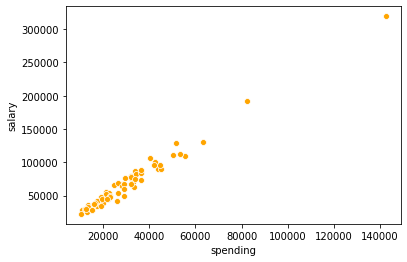

In [143]:
fig=plt.figure()
sns.scatterplot(x='spending',y='salary',color='orange',data=df_pred)

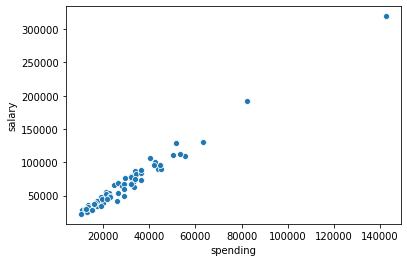

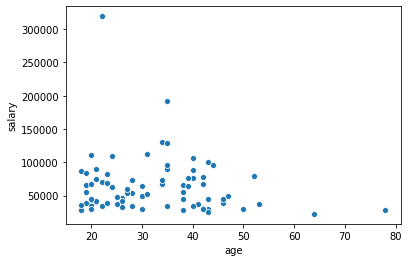

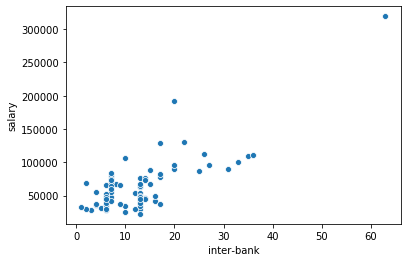

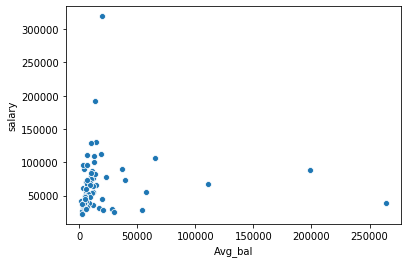

In [122]:
fig=plt.figure()
sns.scatterplot(x='spending',y='salary',data=df_pred)
fig=plt.figure()
sns.scatterplot(x='age',y='salary',data=df_pred)
fig=plt.figure()
sns.scatterplot(x='inter-bank',y='salary',data=df_pred)
fig=plt.figure()
sns.scatterplot(x='Avg_bal',y='salary',data=df_pred)

# Predictive Models
## regression and classification models with accuracy

In [136]:
#model
from sklearn import linear_model
regr = linear_model.LinearRegression()
X=np.asanyarray(df_pred[['spending','payment','POS','Sale-pos','inter-bank']])
y=np.asanyarray(df_pred['salary'])
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
#accuracy
from sklearn import metrics
pred=regr.predict(X)
regr.score(X,y)

0.9896187622884146

In [126]:
#descision model
y=df_pred['Class']
from sklearn.tree import DecisionTreeClassifier
Saltree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Saltree.fit(X,y)
pred=Saltree.predict(X)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y,pred))

DecisionTrees's Accuracy:  0.975
